In [1]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
data = pd.read_csv('processed_data.csv')
data

,Depth (m),SPT_N,Soil Type,Vs (m/s)
0,1.5,4,Sand,70
1,3.0,5,Sand,135
2,4.5,3,Sand,175
3,6.0,2,Sand,200
4,7.5,10,Sand,290
...,...,...,...,...
7220,1.5,14,Clay,55
7221,3.0,21,Clay,60
7222,4.5,22,Clay,160
7223,6.0,17,Clay,190


In [2]:
data = pd.get_dummies(data, columns=["Soil Type"], prefix=["Soil_Type"], drop_first=True, dtype=int)
data=data.sample(frac=1.0)
data

,Depth (m),SPT_N,Vs (m/s),Soil_Type_Sand
1977,19.5,38,290,1
3810,6.0,2,122,1
5666,12.0,4,150,0
1905,25.5,29,295,1
79,13.5,18,185,1
...,...,...,...,...
5511,6.0,20,180,0
4766,27.0,11,330,0
353,30.0,79,455,1
1657,7.5,3,150,1


In [3]:
import math
import pandas as pd
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from scipy.stats import spearmanr

class Rho_scale():
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        rho, _ = spearmanr(X, y)
        self.rho_dict = {}
        summ = 0
        
        for i, feature_name in enumerate(X.columns):
            self.rho_dict[feature_name] = math.exp(rho[i][-1])
            summ += self.rho_dict[feature_name]
        for key in self.rho_dict.keys():
            self.rho_dict[key] = self.rho_dict[key] / summ
            
        self.scaler = RobustScaler()
        self.scaler.fit(X)

    def transform(self, X_test):
        X_scaled = self.scaler.transform(X_test)
        for feature_name in self.X.columns:
            X_scaled[:, self.X.columns.get_loc(feature_name)] *= self.rho_dict[feature_name]
        return pd.DataFrame(X_scaled, columns=self.X.columns)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)


# No Preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

X=data.drop('Vs (m/s)', axis=1)
y=data['Vs (m/s)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
regressors = [
    KNeighborsRegressor(n_neighbors=5),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    AdaBoostRegressor(),
    CatBoostRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[
        ('knn', KNeighborsRegressor(n_neighbors=5)),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ])
]

regressor_names = []  
mae_scores = []       
mse_scores = []       
rmse_scores = []      
r2_scores = [] 



for regressor in regressors:


    regressor.fit(X_train, y_train)
    

    y_pred = regressor.predict(X_test)
    

    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = sqrt(mse_test)
    

    print(f"Regressor: {regressor.__class__.__name__}")
    print("Test set results:")
    print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
    print(f"Mean Squared Error (MSE) on test data: {mse_test}")
    print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
    print(f"R-squared (R2) on test data: {r2_test}")
    print("\n")
    regressor_names.append(regressor.__class__.__name__)
    mae_scores.append(mae_test)
    mse_scores.append(mse_test)
    rmse_scores.append(rmse_test)
    r2_scores.append(r2_test)

Regressor: KNeighborsRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.034602076124564
Mean Squared Error (MSE) on test data: 3880.8465051903117
Root Mean Squared Error (RMSE) on test data: 62.296440549924775
R-squared (R2) on test data: 0.5639333564604315


Regressor: SVR
Test set results:
Mean Absolute Error (MAE) on test data: 46.006349926287605
Mean Squared Error (MSE) on test data: 3922.8101610941344
Root Mean Squared Error (RMSE) on test data: 62.632341175259725
R-squared (R2) on test data: 0.5592181608050104


Regressor: DecisionTreeRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 48.77726786974437
Mean Squared Error (MSE) on test data: 4625.850243808066
Root Mean Squared Error (RMSE) on test data: 68.01360337320811
R-squared (R2) on test data: 0.48022190863867775


Regressor: RandomForestRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.086063473971564
Mean Squared Error (MSE) on test data: 4028.7201242257024
Root Mea

398:	learn: 55.2233482	total: 243ms	remaining: 366ms
399:	learn: 55.2165113	total: 244ms	remaining: 366ms
400:	learn: 55.2160851	total: 244ms	remaining: 365ms
401:	learn: 55.2153242	total: 245ms	remaining: 364ms
402:	learn: 55.2093262	total: 245ms	remaining: 363ms
403:	learn: 55.2085459	total: 246ms	remaining: 363ms
404:	learn: 55.1953254	total: 246ms	remaining: 362ms
405:	learn: 55.1947745	total: 247ms	remaining: 361ms
406:	learn: 55.1878774	total: 247ms	remaining: 360ms
407:	learn: 55.1756645	total: 248ms	remaining: 360ms
408:	learn: 55.1709221	total: 248ms	remaining: 359ms
409:	learn: 55.1662852	total: 249ms	remaining: 358ms
410:	learn: 55.1653028	total: 249ms	remaining: 358ms
411:	learn: 55.1604062	total: 250ms	remaining: 357ms
412:	learn: 55.1560792	total: 250ms	remaining: 356ms
413:	learn: 55.1526374	total: 251ms	remaining: 355ms
414:	learn: 55.1461895	total: 252ms	remaining: 355ms
415:	learn: 55.1456764	total: 252ms	remaining: 354ms
416:	learn: 55.1451092	total: 253ms	remaining:

710:	learn: 54.1712476	total: 402ms	remaining: 163ms
711:	learn: 54.1710827	total: 402ms	remaining: 163ms
712:	learn: 54.1673460	total: 403ms	remaining: 162ms
713:	learn: 54.1637094	total: 403ms	remaining: 161ms
714:	learn: 54.1593279	total: 404ms	remaining: 161ms
715:	learn: 54.1584754	total: 404ms	remaining: 160ms
716:	learn: 54.1523801	total: 405ms	remaining: 160ms
717:	learn: 54.1522860	total: 405ms	remaining: 159ms
718:	learn: 54.1492118	total: 406ms	remaining: 159ms
719:	learn: 54.1437510	total: 406ms	remaining: 158ms
720:	learn: 54.1407136	total: 407ms	remaining: 157ms
721:	learn: 54.1382392	total: 407ms	remaining: 157ms
722:	learn: 54.1370216	total: 408ms	remaining: 156ms
723:	learn: 54.1353531	total: 408ms	remaining: 156ms
724:	learn: 54.1330528	total: 409ms	remaining: 155ms
725:	learn: 54.1317558	total: 409ms	remaining: 154ms
726:	learn: 54.1313227	total: 410ms	remaining: 154ms
727:	learn: 54.1294048	total: 410ms	remaining: 153ms
728:	learn: 54.1286475	total: 411ms	remaining:

Regressor: CatBoostRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 42.558335608755996
Mean Squared Error (MSE) on test data: 3386.443148781019
Root Mean Squared Error (RMSE) on test data: 58.1931537964821
R-squared (R2) on test data: 0.6194863941535635


Regressor: XGBRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 44.863800267942224
Mean Squared Error (MSE) on test data: 3755.8094810834214
Root Mean Squared Error (RMSE) on test data: 61.284659427000335
R-squared (R2) on test data: 0.5779829910820394


Regressor: GradientBoostingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 41.89763847474219
Mean Squared Error (MSE) on test data: 3263.2121820231623
Root Mean Squared Error (RMSE) on test data: 57.12453222585864
R-squared (R2) on test data: 0.6333330933163277


Regressor: VotingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 44.83380027856861
Mean Squared Error (MSE) on test data: 3746.332489680286
Root Mea

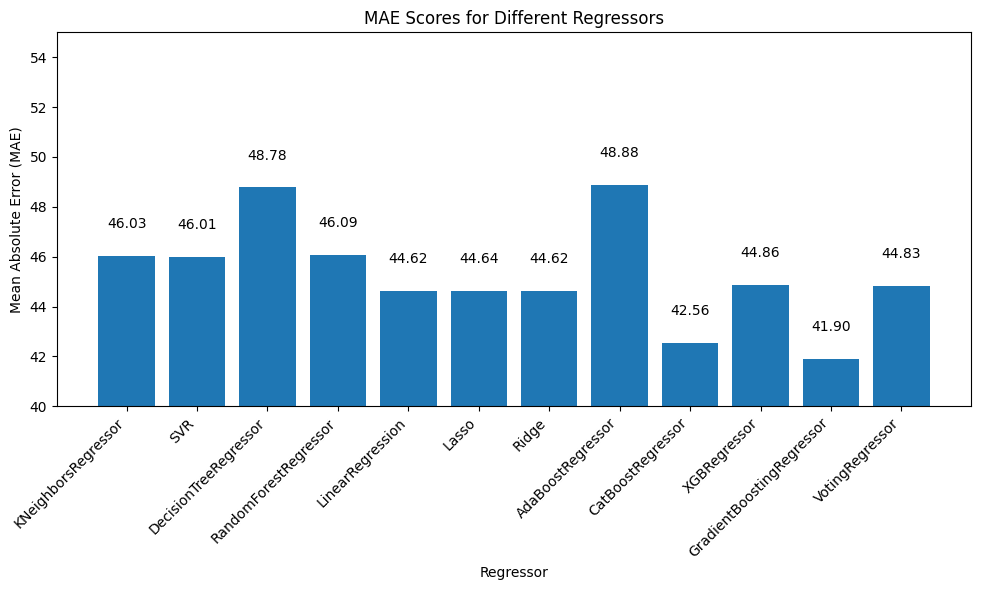

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bar_plot = plt.bar(regressor_names, mae_scores)
plt.xlabel('Regressor')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Scores for Different Regressors')
plt.xticks(rotation=45, ha="right") 
plt.ylim(40, 55)

for bar, mae in zip(bar_plot, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, mae + 1, f'{mae:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Feature Scaling with Newly Developed Suprvised feature scaler

In [7]:

rho_scaler = Rho_scale()

rho_scaler.fit(X_train, y_train)


X_train_scaled = rho_scaler.transform(X_train)
X_test_scaled = rho_scaler.transform(X_test)


regressors = [
    KNeighborsRegressor(n_neighbors=5),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    AdaBoostRegressor(),
    CatBoostRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[
        ('knn', KNeighborsRegressor(n_neighbors=5)),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ])
]



regressor_names = []  
mae_scores = []       
mse_scores = []       
rmse_scores = []      
r2_scores = [] 


rho_scaler = Rho_scale()
rho_scaler.fit(X_train, y_train)
    

X_train_scaled = rho_scaler.transform(X_train)
X_test_scaled = rho_scaler.transform(X_test)
    

for regressor in regressors:


    regressor.fit(X_train_scaled, y_train)
    

    y_pred = regressor.predict(X_test_scaled)
    

    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = sqrt(mse_test)
    

    print(f"Regressor: {regressor.__class__.__name__}")
    print("Test set results:")
    print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
    print(f"Mean Squared Error (MSE) on test data: {mse_test}")
    print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
    print(f"R-squared (R2) on test data: {r2_test}")
    print("\n")
    regressor_names.append(regressor.__class__.__name__)
    mae_scores.append(mae_test)
    mse_scores.append(mse_test)
    rmse_scores.append(rmse_test)
    r2_scores.append(r2_test)
    

Regressor: KNeighborsRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.275017301038055
Mean Squared Error (MSE) on test data: 3946.7654256055357
Root Mean Squared Error (RMSE) on test data: 62.8232872874823
R-squared (R2) on test data: 0.5565264563594421


Regressor: SVR
Test set results:
Mean Absolute Error (MAE) on test data: 45.01923801300573
Mean Squared Error (MSE) on test data: 3813.4996361650515
Root Mean Squared Error (RMSE) on test data: 61.75353946264984
R-squared (R2) on test data: 0.5715007062871942


Regressor: DecisionTreeRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 48.77311562060942
Mean Squared Error (MSE) on test data: 4602.004915088343
Root Mean Squared Error (RMSE) on test data: 67.83807865121435
R-squared (R2) on test data: 0.4829012602814188


Regressor: RandomForestRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.13755949337966
Mean Squared Error (MSE) on test data: 3987.5785093829977
Root Mean Squa

156:	learn: 56.2812095	total: 77.6ms	remaining: 417ms
157:	learn: 56.2681341	total: 78.2ms	remaining: 417ms
158:	learn: 56.2648599	total: 78.8ms	remaining: 417ms
159:	learn: 56.2598191	total: 79.3ms	remaining: 416ms
160:	learn: 56.2586322	total: 79.9ms	remaining: 416ms
161:	learn: 56.2551918	total: 80.4ms	remaining: 416ms
162:	learn: 56.2510473	total: 81ms	remaining: 416ms
163:	learn: 56.2457409	total: 81.5ms	remaining: 416ms
164:	learn: 56.2389152	total: 82.1ms	remaining: 415ms
165:	learn: 56.2352404	total: 82.6ms	remaining: 415ms
166:	learn: 56.2327730	total: 83.1ms	remaining: 415ms
167:	learn: 56.2288683	total: 83.6ms	remaining: 414ms
168:	learn: 56.2260094	total: 84.2ms	remaining: 414ms
169:	learn: 56.2194588	total: 84.7ms	remaining: 413ms
170:	learn: 56.2170933	total: 85.2ms	remaining: 413ms
171:	learn: 56.2060823	total: 85.7ms	remaining: 413ms
172:	learn: 56.2016516	total: 86.2ms	remaining: 412ms
173:	learn: 56.1983079	total: 86.8ms	remaining: 412ms
174:	learn: 56.1948195	total: 

476:	learn: 54.9051025	total: 235ms	remaining: 258ms
477:	learn: 54.9045303	total: 236ms	remaining: 257ms
478:	learn: 54.9006585	total: 236ms	remaining: 257ms
479:	learn: 54.8984367	total: 237ms	remaining: 257ms
480:	learn: 54.8979816	total: 237ms	remaining: 256ms
481:	learn: 54.8967450	total: 238ms	remaining: 256ms
482:	learn: 54.8903947	total: 238ms	remaining: 255ms
483:	learn: 54.8901182	total: 239ms	remaining: 255ms
484:	learn: 54.8899812	total: 239ms	remaining: 254ms
485:	learn: 54.8820741	total: 240ms	remaining: 254ms
486:	learn: 54.8806221	total: 241ms	remaining: 253ms
487:	learn: 54.8802867	total: 241ms	remaining: 253ms
488:	learn: 54.8744618	total: 242ms	remaining: 253ms
489:	learn: 54.8646031	total: 242ms	remaining: 252ms
490:	learn: 54.8595321	total: 243ms	remaining: 252ms
491:	learn: 54.8545818	total: 243ms	remaining: 251ms
492:	learn: 54.8525989	total: 244ms	remaining: 251ms
493:	learn: 54.8483863	total: 244ms	remaining: 250ms
494:	learn: 54.8414588	total: 245ms	remaining:

788:	learn: 53.9319338	total: 392ms	remaining: 105ms
789:	learn: 53.9306397	total: 393ms	remaining: 104ms
790:	learn: 53.9263052	total: 393ms	remaining: 104ms
791:	learn: 53.9204416	total: 394ms	remaining: 103ms
792:	learn: 53.9186865	total: 395ms	remaining: 103ms
793:	learn: 53.9140599	total: 395ms	remaining: 102ms
794:	learn: 53.9129118	total: 396ms	remaining: 102ms
795:	learn: 53.9109698	total: 396ms	remaining: 102ms
796:	learn: 53.9078477	total: 397ms	remaining: 101ms
797:	learn: 53.9027119	total: 397ms	remaining: 101ms
798:	learn: 53.8978358	total: 398ms	remaining: 100ms
799:	learn: 53.8942298	total: 398ms	remaining: 99.6ms
800:	learn: 53.8901547	total: 399ms	remaining: 99.1ms
801:	learn: 53.8862953	total: 399ms	remaining: 98.6ms
802:	learn: 53.8841737	total: 400ms	remaining: 98.1ms
803:	learn: 53.8830194	total: 400ms	remaining: 97.6ms
804:	learn: 53.8829018	total: 401ms	remaining: 97.1ms
805:	learn: 53.8827854	total: 401ms	remaining: 96.6ms
806:	learn: 53.8775660	total: 402ms	rem

Regressor: CatBoostRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 42.558335608755996
Mean Squared Error (MSE) on test data: 3386.443148781019
Root Mean Squared Error (RMSE) on test data: 58.1931537964821
R-squared (R2) on test data: 0.6194863941535635


Regressor: XGBRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 44.863800267942224
Mean Squared Error (MSE) on test data: 3755.8094810834214
Root Mean Squared Error (RMSE) on test data: 61.284659427000335
R-squared (R2) on test data: 0.5779829910820394


Regressor: GradientBoostingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 41.89763847474219
Mean Squared Error (MSE) on test data: 3263.2121820231623
Root Mean Squared Error (RMSE) on test data: 57.12453222585864
R-squared (R2) on test data: 0.6333330933163277


Regressor: VotingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 44.914333828647834
Mean Squared Error (MSE) on test data: 3754.291264650491
Root Me

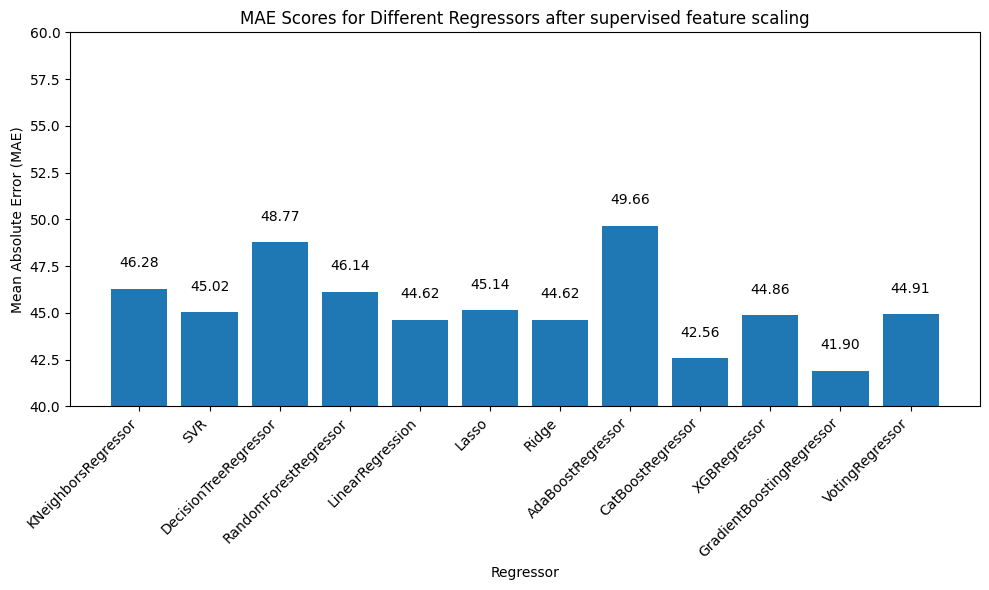

In [8]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(regressor_names, mae_scores)
plt.xlabel('Regressor')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Scores for Different Regressors after supervised feature scaling')
plt.xticks(rotation=45, ha="right") 
plt.ylim(40, 60)

for bar, mae in zip(bar_plot, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, mae + 1, f'{mae:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# The proposed feature scaling reduced the error 
# Delete Outliers (in training data) with supervised feature scaling

In [9]:
from scipy import stats

z_scores_x = np.abs(stats.zscore(X_train))
z_scores_y = np.abs(stats.zscore(y_train))
threshold = 3

outliers_x = np.where(z_scores_x > threshold)
outliers_y = np.where(z_scores_y > threshold)

common_indices = np.intersect1d(outliers_x, outliers_y)

X_train_clean = np.delete(X_train, common_indices, axis=0)
y_train_clean = np.delete(y_train, common_indices)
X_train_clean = pd.DataFrame(X_train_clean, columns=X_train.columns)

In [10]:

rho_scaler = Rho_scale()

rho_scaler.fit(X_train_clean, y_train_clean)


X_train_scaled = rho_scaler.transform(X_train_clean)
X_test_scaled = rho_scaler.transform(X_test)


regressors = [
    KNeighborsRegressor(n_neighbors=5),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    AdaBoostRegressor(),
    CatBoostRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[
        ('knn', KNeighborsRegressor(n_neighbors=5)),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ])
]



regressor_names = []  
mae_scores = []       
mse_scores = []       
rmse_scores = []      
r2_scores = [] 



for regressor in regressors:


    regressor.fit(X_train_scaled, y_train_clean)
    

    y_pred = regressor.predict(X_test_scaled)
    

    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = sqrt(mse_test)
    

    print(f"Regressor: {regressor.__class__.__name__}")
    print("Test set results:")
    print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
    print(f"Mean Squared Error (MSE) on test data: {mse_test}")
    print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
    print(f"R-squared (R2) on test data: {r2_test}")
    print("\n")
    regressor_names.append(regressor.__class__.__name__)
    mae_scores.append(mae_test)
    mse_scores.append(mse_test)
    rmse_scores.append(rmse_test)
    r2_scores.append(r2_test)
    

Regressor: KNeighborsRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 45.31820069204152
Mean Squared Error (MSE) on test data: 3852.591557093426
Root Mean Squared Error (RMSE) on test data: 62.069248079007906
R-squared (R2) on test data: 0.5671081896736274


Regressor: SVR
Test set results:
Mean Absolute Error (MAE) on test data: 45.030665572288484
Mean Squared Error (MSE) on test data: 3818.384563142044
Root Mean Squared Error (RMSE) on test data: 61.79307860223541
R-squared (R2) on test data: 0.5709518173507355


Regressor: DecisionTreeRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 48.649009507575975
Mean Squared Error (MSE) on test data: 4602.258317625829
Root Mean Squared Error (RMSE) on test data: 67.83994632682007
R-squared (R2) on test data: 0.4828727870104873


Regressor: RandomForestRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.10267976573141
Mean Squared Error (MSE) on test data: 4003.8837275452843
Root Mean Squ

408:	learn: 54.9211365	total: 201ms	remaining: 290ms
409:	learn: 54.9179903	total: 201ms	remaining: 289ms
410:	learn: 54.9108099	total: 202ms	remaining: 289ms
411:	learn: 54.8964137	total: 202ms	remaining: 289ms
412:	learn: 54.8932786	total: 203ms	remaining: 288ms
413:	learn: 54.8902640	total: 203ms	remaining: 288ms
414:	learn: 54.8877286	total: 204ms	remaining: 287ms
415:	learn: 54.8791083	total: 204ms	remaining: 287ms
416:	learn: 54.8720021	total: 205ms	remaining: 286ms
417:	learn: 54.8662712	total: 205ms	remaining: 286ms
418:	learn: 54.8577894	total: 206ms	remaining: 285ms
419:	learn: 54.8569619	total: 206ms	remaining: 285ms
420:	learn: 54.8547574	total: 207ms	remaining: 284ms
421:	learn: 54.8531021	total: 207ms	remaining: 284ms
422:	learn: 54.8520745	total: 208ms	remaining: 283ms
423:	learn: 54.8515186	total: 208ms	remaining: 283ms
424:	learn: 54.8498048	total: 209ms	remaining: 283ms
425:	learn: 54.8479589	total: 209ms	remaining: 282ms
426:	learn: 54.8449189	total: 210ms	remaining:

724:	learn: 53.8803121	total: 360ms	remaining: 136ms
725:	learn: 53.8797117	total: 360ms	remaining: 136ms
726:	learn: 53.8763771	total: 361ms	remaining: 135ms
727:	learn: 53.8756592	total: 361ms	remaining: 135ms
728:	learn: 53.8736811	total: 362ms	remaining: 135ms
729:	learn: 53.8704972	total: 362ms	remaining: 134ms
730:	learn: 53.8688331	total: 363ms	remaining: 134ms
731:	learn: 53.8670033	total: 363ms	remaining: 133ms
732:	learn: 53.8639973	total: 364ms	remaining: 133ms
733:	learn: 53.8595487	total: 364ms	remaining: 132ms
734:	learn: 53.8574409	total: 365ms	remaining: 132ms
735:	learn: 53.8539717	total: 365ms	remaining: 131ms
736:	learn: 53.8504016	total: 366ms	remaining: 131ms
737:	learn: 53.8490918	total: 366ms	remaining: 130ms
738:	learn: 53.8445311	total: 367ms	remaining: 130ms
739:	learn: 53.8421569	total: 368ms	remaining: 129ms
740:	learn: 53.8407251	total: 368ms	remaining: 129ms
741:	learn: 53.8375781	total: 369ms	remaining: 128ms
742:	learn: 53.8369403	total: 369ms	remaining:

Regressor: CatBoostRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 42.50053196908925
Mean Squared Error (MSE) on test data: 3376.5434442577102
Root Mean Squared Error (RMSE) on test data: 58.10803252785031
R-squared (R2) on test data: 0.6205987625293133


Regressor: XGBRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 44.88894488324756
Mean Squared Error (MSE) on test data: 3833.578063214357
Root Mean Squared Error (RMSE) on test data: 61.915895077228406
R-squared (R2) on test data: 0.5692446180138664


Regressor: GradientBoostingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 41.91193383561247
Mean Squared Error (MSE) on test data: 3279.243055125703
Root Mean Squared Error (RMSE) on test data: 57.26467545639024
R-squared (R2) on test data: 0.6315318035674329


Regressor: VotingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 44.81240596818433
Mean Squared Error (MSE) on test data: 3783.0232778532863
Root Mean

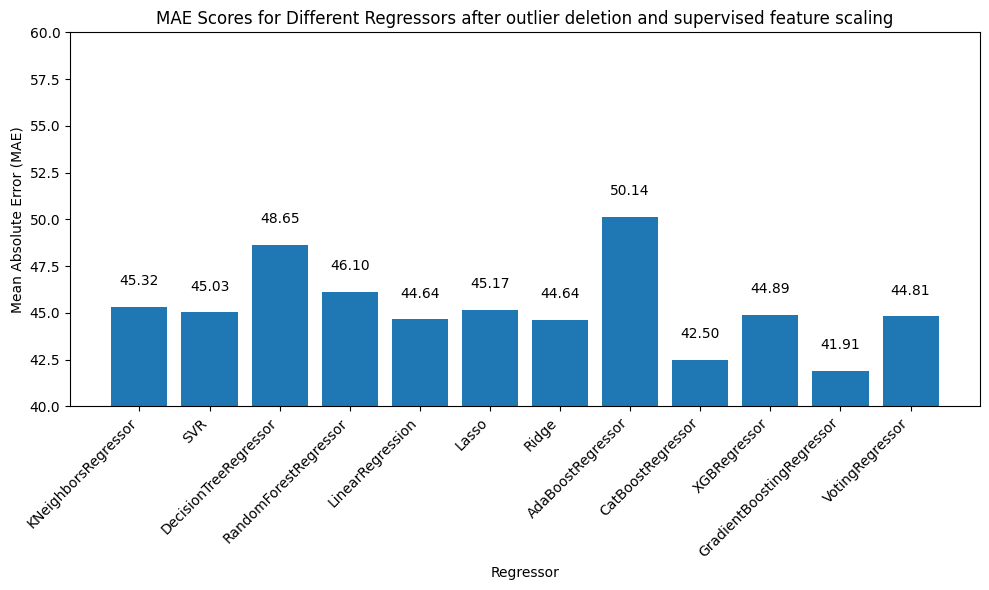

In [11]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(regressor_names, mae_scores)
plt.xlabel('Regressor')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Scores for Different Regressors after outlier deletion and supervised feature scaling')
plt.xticks(rotation=45, ha="right") 
plt.ylim(40, 60)

for bar, mae in zip(bar_plot, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, mae + 1, f'{mae:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
best_model=GradientBoostingRegressor()

best_model.fit(X_train_scaled, y_train_clean)
y_pred = best_model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred)

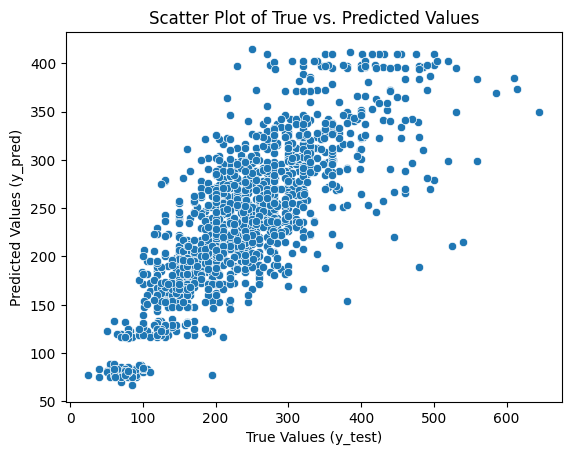

In [13]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.show()

## Relatively Better
# Try deleting the least-contributing Column

In [14]:
X_train_clean=X_train_clean.drop('Soil_Type_Sand',axis=1)
X_train_clean

,Depth (m),SPT_N
0,25.5,57.0
1,13.5,19.0
2,7.5,7.0
3,15.0,20.0
4,22.5,50.0
...,...,...
5771,22.5,14.0
5772,28.5,52.0
5773,10.5,10.0
5774,3.0,8.0


In [15]:
X_test=X_test.drop('Soil_Type_Sand',axis=1)
X_test

,Depth (m),SPT_N
4299,15.0,23
1358,13.5,13
460,15.0,7
5214,19.5,15
3656,13.5,42
...,...,...
4911,3.0,7
2600,19.5,48
4992,7.5,11
6696,19.5,30


In [16]:

rho_scaler = Rho_scale()

rho_scaler.fit(X_train_clean, y_train_clean)


X_train_scaled = rho_scaler.transform(X_train_clean)
X_test_scaled = rho_scaler.transform(X_test)


regressors = [
    KNeighborsRegressor(n_neighbors=5),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    AdaBoostRegressor(),
    CatBoostRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[
        ('knn', KNeighborsRegressor(n_neighbors=5)),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ])
]



regressor_names = []  
mae_scores = []       
mse_scores = []       
rmse_scores = []      
r2_scores = [] 



for regressor in regressors:


    regressor.fit(X_train_scaled, y_train_clean)
    

    y_pred = regressor.predict(X_test_scaled)
    

    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = sqrt(mse_test)
    

    print(f"Regressor: {regressor.__class__.__name__}")
    print("Test set results:")
    print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
    print(f"Mean Squared Error (MSE) on test data: {mse_test}")
    print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
    print(f"R-squared (R2) on test data: {r2_test}")
    print("\n")
    regressor_names.append(regressor.__class__.__name__)
    mae_scores.append(mae_test)
    mse_scores.append(mse_test)
    rmse_scores.append(rmse_test)
    r2_scores.append(r2_test)
    

Regressor: KNeighborsRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.780484429065744
Mean Squared Error (MSE) on test data: 3955.1367474048448
Root Mean Squared Error (RMSE) on test data: 62.88987794076917
R-squared (R2) on test data: 0.5555858228677201


Regressor: SVR
Test set results:
Mean Absolute Error (MAE) on test data: 45.41536073523018
Mean Squared Error (MSE) on test data: 3862.484730855654
Root Mean Squared Error (RMSE) on test data: 62.14889163014618
R-squared (R2) on test data: 0.565996555118981


Regressor: DecisionTreeRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 47.226313939689945
Mean Squared Error (MSE) on test data: 4183.135688219213
Root Mean Squared Error (RMSE) on test data: 64.67716512200587
R-squared (R2) on test data: 0.5299669964806087


Regressor: RandomForestRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 45.78679744287848
Mean Squared Error (MSE) on test data: 3841.724597932718
Root Mean Squar

432:	learn: 56.0638650	total: 212ms	remaining: 277ms
433:	learn: 56.0591837	total: 212ms	remaining: 277ms
434:	learn: 56.0553543	total: 213ms	remaining: 276ms
435:	learn: 56.0539731	total: 213ms	remaining: 276ms
436:	learn: 56.0495157	total: 214ms	remaining: 275ms
437:	learn: 56.0452089	total: 214ms	remaining: 275ms
438:	learn: 56.0440230	total: 215ms	remaining: 275ms
439:	learn: 56.0418276	total: 215ms	remaining: 274ms
440:	learn: 56.0342211	total: 216ms	remaining: 274ms
441:	learn: 56.0302055	total: 216ms	remaining: 273ms
442:	learn: 56.0261376	total: 217ms	remaining: 273ms
443:	learn: 56.0216689	total: 217ms	remaining: 272ms
444:	learn: 56.0124367	total: 218ms	remaining: 272ms
445:	learn: 56.0111618	total: 218ms	remaining: 271ms
446:	learn: 56.0106700	total: 219ms	remaining: 271ms
447:	learn: 56.0079462	total: 219ms	remaining: 270ms
448:	learn: 56.0067832	total: 220ms	remaining: 270ms
449:	learn: 56.0061387	total: 220ms	remaining: 269ms
450:	learn: 56.0035933	total: 221ms	remaining:

750:	learn: 55.2028069	total: 370ms	remaining: 123ms
751:	learn: 55.1940580	total: 371ms	remaining: 122ms
752:	learn: 55.1917145	total: 371ms	remaining: 122ms
753:	learn: 55.1886432	total: 372ms	remaining: 121ms
754:	learn: 55.1850030	total: 372ms	remaining: 121ms
755:	learn: 55.1823523	total: 373ms	remaining: 120ms
756:	learn: 55.1794170	total: 374ms	remaining: 120ms
757:	learn: 55.1785004	total: 374ms	remaining: 119ms
758:	learn: 55.1780956	total: 375ms	remaining: 119ms
759:	learn: 55.1776521	total: 375ms	remaining: 118ms
760:	learn: 55.1775052	total: 375ms	remaining: 118ms
761:	learn: 55.1765896	total: 376ms	remaining: 117ms
762:	learn: 55.1765081	total: 376ms	remaining: 117ms
763:	learn: 55.1761441	total: 377ms	remaining: 116ms
764:	learn: 55.1760456	total: 377ms	remaining: 116ms
765:	learn: 55.1754029	total: 378ms	remaining: 115ms
766:	learn: 55.1732793	total: 378ms	remaining: 115ms
767:	learn: 55.1708626	total: 379ms	remaining: 114ms
768:	learn: 55.1691036	total: 379ms	remaining:

Regressor: CatBoostRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 43.219269618258124
Mean Squared Error (MSE) on test data: 3439.6582547299436
Root Mean Squared Error (RMSE) on test data: 58.648599767854165
R-squared (R2) on test data: 0.6135069428648525


Regressor: XGBRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 45.1604370803569
Mean Squared Error (MSE) on test data: 3770.414135441206
Root Mean Squared Error (RMSE) on test data: 61.403698059980115
R-squared (R2) on test data: 0.5763419566846889


Regressor: GradientBoostingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 42.522994753361715
Mean Squared Error (MSE) on test data: 3344.8149958526897
Root Mean Squared Error (RMSE) on test data: 57.834375555137534
R-squared (R2) on test data: 0.6241638914212166


Regressor: VotingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 45.14039894834975
Mean Squared Error (MSE) on test data: 3734.361928638473
Root M

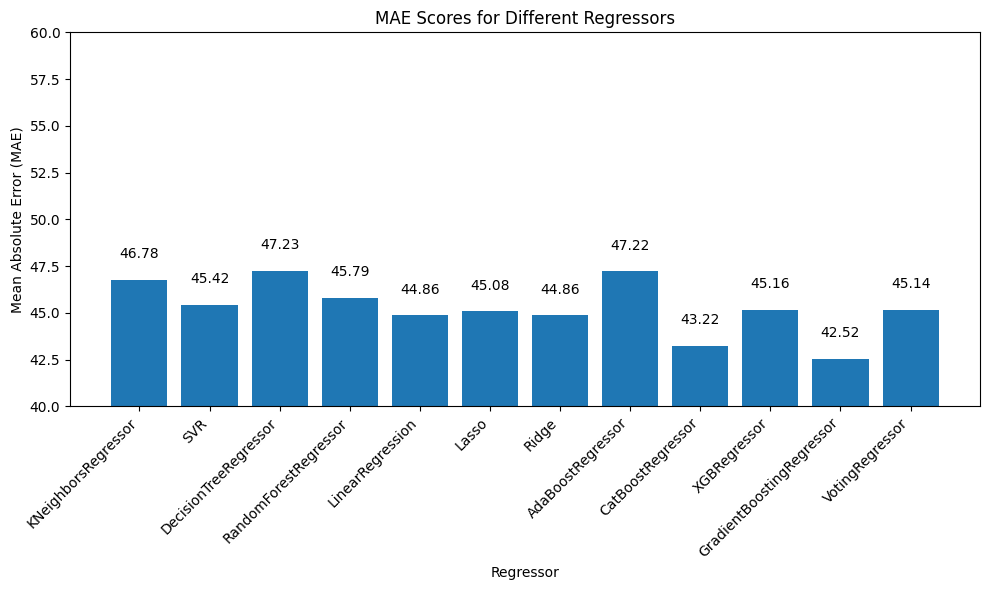

In [17]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(regressor_names, mae_scores)
plt.xlabel('Regressor')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Scores for Different Regressors')
plt.xticks(rotation=45, ha="right") 
plt.ylim(40, 60)

for bar, mae in zip(bar_plot, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, mae + 1, f'{mae:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Gradient Boosting performed better
# Best performance provided by supervised feature scaling with outlier deletion